<a href="https://colab.research.google.com/github/Marali03/Prodigy/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA PROCESSING

In [33]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


<ipython-input-33-0b5ca452d38a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [31]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

<ipython-input-31-372c3d2cac6b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


In [32]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

<ipython-input-32-30aee3a2a101>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


DATA VISUALISATION

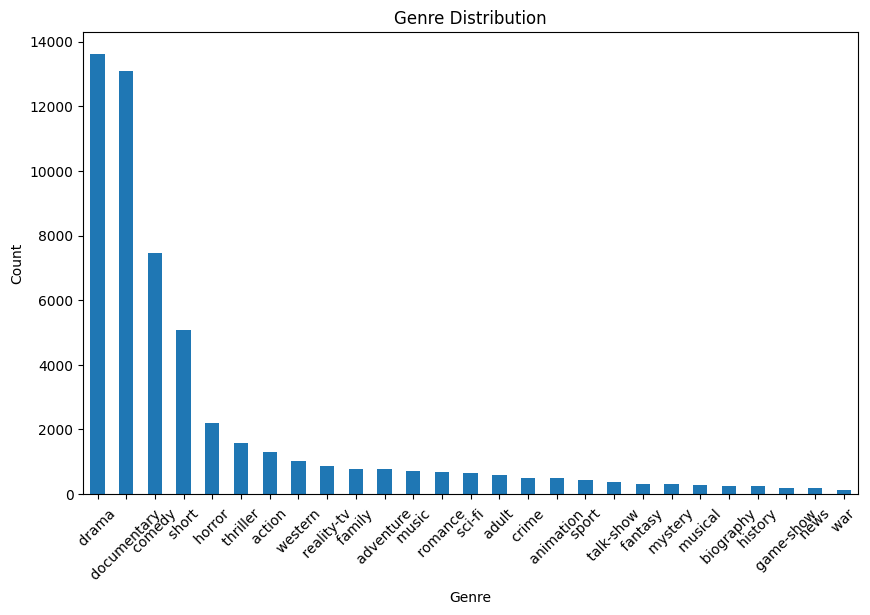

In [37]:
import matplotlib.pyplot as plt

genre_counts = train_data['GENRE'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


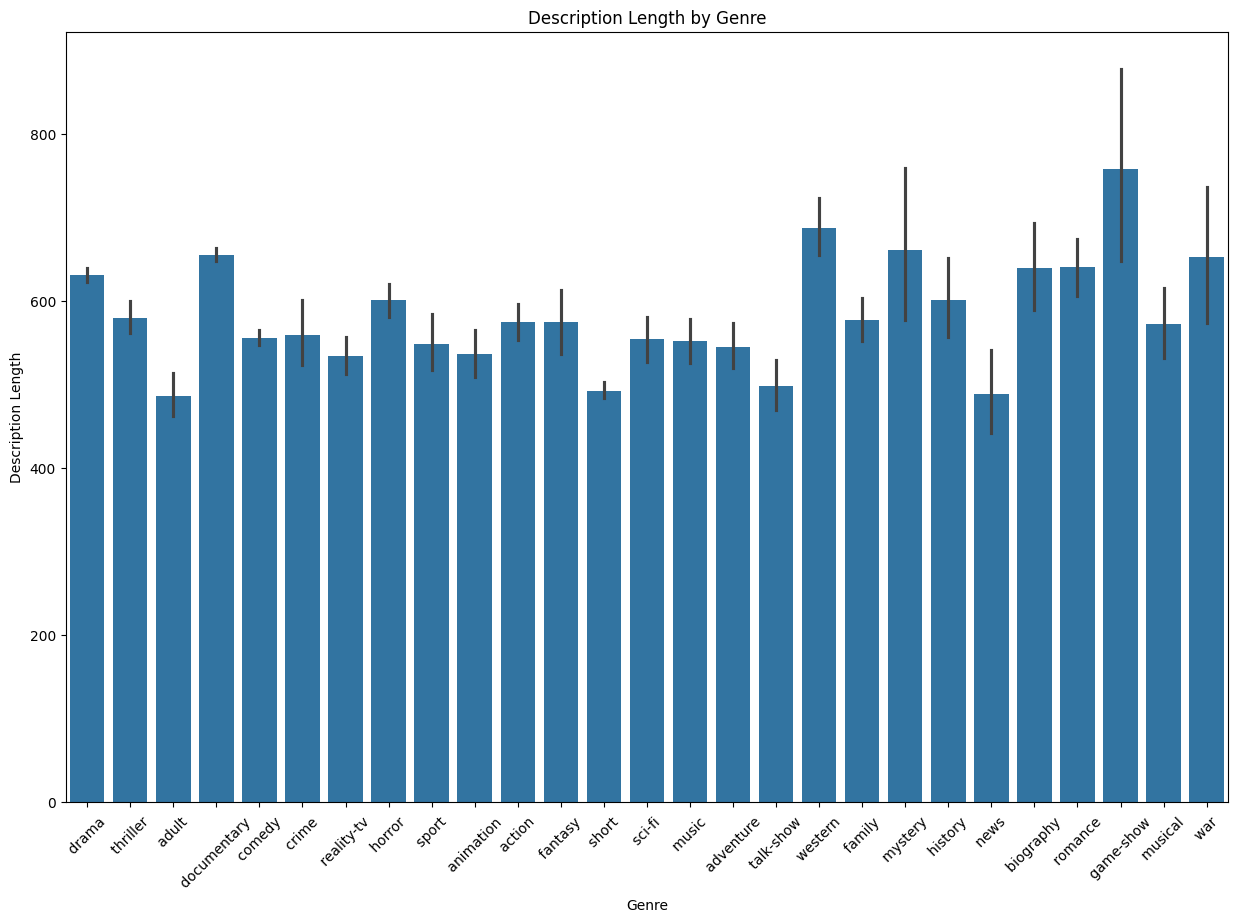

In [38]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

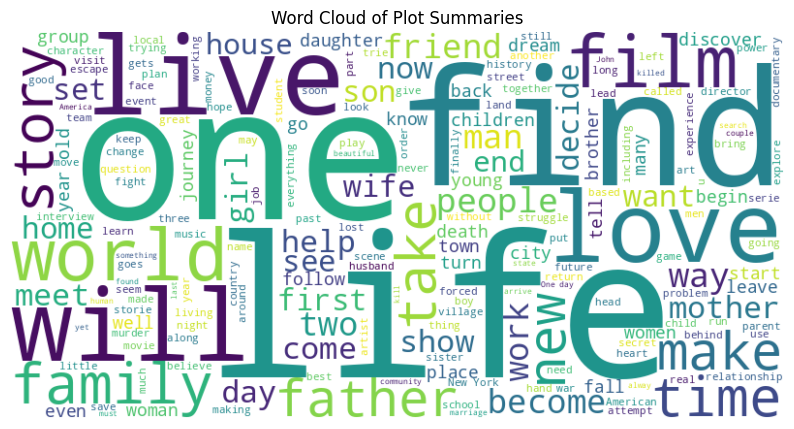

In [40]:
from wordcloud import WordCloud

text = ' '.join(train_data['DESCRIPTION'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Plot Summaries')
plt.axis('off')
plt.show()

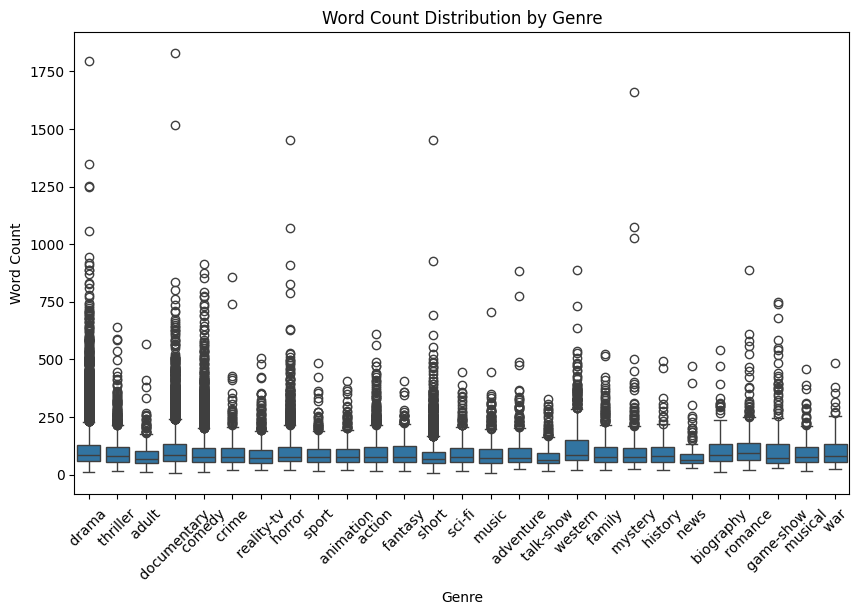

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='GENRE', y=train_data['DESCRIPTION'].apply(lambda x: len(x.split())))
plt.title('Word Count Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

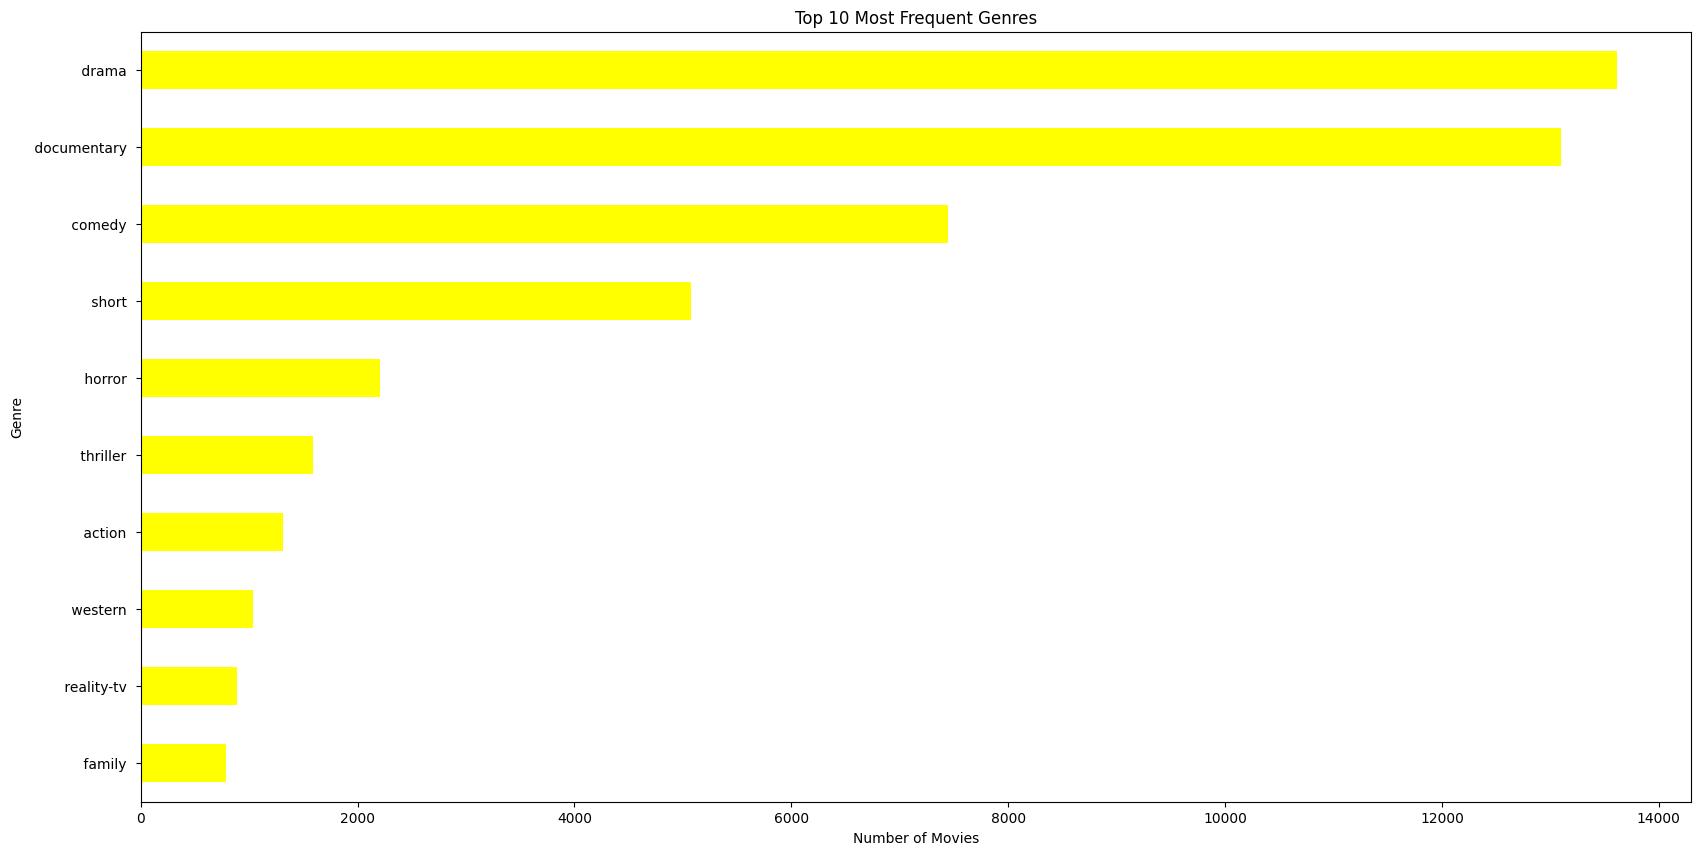

In [43]:
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='yellow')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

HANDLING TRANING AND TEST DATASETS

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  54214 non-null  int64 
 1   TITLE               54214 non-null  object
 2   GENRE               54214 non-null  object
 3   DESCRIPTION         54214 non-null  object
 4   DESCRIPTION_length  54214 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [50]:
#Finda any null value
train_data.isnull().sum()

ID                    0
TITLE                 0
GENRE                 0
DESCRIPTION           0
DESCRIPTION_length    0
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [65]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [66]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.580282209720557
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.34      0.38       253
           1       0.81      0.40      0.54       120
           2       0.50      0.23      0.31       155
           3       0.39      0.13      0.19       101
           4       0.00      0.00      0.00        48
           5       0.53      0.58      0.55      1474
           6       0.31      0.04      0.08       112
           7       0.69      0.83      0.75      2634
           8       0.56      0.71      0.62      2726
           9       0.40      0.18      0.25       161
          10       0.21      0.04      0.07        75
          11       0.78      0.76      0.77        41
          12       0.00      0.00      0.00        57
          13       0.60      0.67      0.63       411
          14       0.64      0.58      0.61       136
          15       0.31      0.06      0.11        63
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [69]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [73]:
#logistic Regression
lr_classifier = LogisticRegression(max_iter=500,solver= 'saga')
lr_classifier.fit(X_train, y_train)
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

FEATURE MODELLING

In [77]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police cashes the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

sample_descr_for_movie2 = "A comedy about a group of friends who get into hilarious situations at a wedding."
print(predict_movie(sample_descr_for_movie2))

sample_descr_for_movie3 = "A heartwarming story about a dog that helps a family overcome their struggles."
print(predict_movie(sample_descr_for_movie3))

sample_descr_for_movie4 = "A gripping thriller about a lawyer who uncovers a conspiracy while defending a high-profile case."
print(predict_movie(sample_descr_for_movie4))

 crime 
 drama 
 comedy 
 family 
 thriller 
